In [21]:
# importando las librerias necesarias.

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
# Leemos los datos a partir del archivo CSV
df_hsegm = pd.read_csv("dataset/hsegm.csv", header=0)
df_hsegm.head(10)

,h,s,v,b,g,r,gr,class
0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,1,0
2,0,0,2,2,2,2,2,0
3,0,0,3,3,3,3,3,0
4,0,0,4,4,4,4,4,0
5,0,0,5,5,5,5,5,0
6,0,0,6,6,6,6,6,0
7,0,0,8,8,8,8,8,0
8,0,0,9,9,9,9,9,0
9,0,0,10,10,10,10,10,0


In [24]:
# divimimos las características de la clase
X, y = df_hsegm.iloc[:, :7], df_hsegm.iloc[:, -1]

#divimos los datos de entranamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [31]:
# generamos un árbol aleatorio con el conjunto de datos
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# se obtienen los nombre de las características
feat_labels = df_hsegm.columns[:7]

# inicializamos la clase arbol
forest_gini = RandomForestClassifier(n_estimators=500, criterion="gini", random_state=42)

forest_gini.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
# obtenemos las importancias
importances = forest_gini.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("{} {} {} {}".format(f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

1 30 g 0.203113590294914
2 30 gr 0.1681691715076722
3 30 h 0.15520659078115828
4 30 v 0.13879534413065878
5 30 r 0.12115284577324971
6 30 s 0.11113480216162491
7 30 b 0.10242765535072212


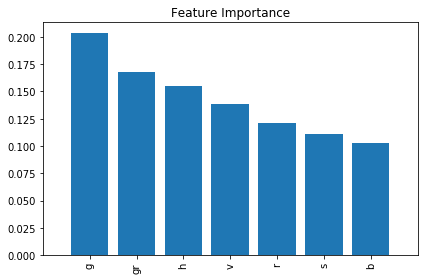

In [33]:
# Generamos la grafica

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')

plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [39]:
# se realiza el mismo trabajo pero ahora con "entropy" como función de ganancia
forest_entropy = RandomForestClassifier(n_estimators=500, criterion="entropy", random_state=42)

forest_entropy.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [40]:
# obtenemos las importancias
importances = forest_entropy.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("{} {} {} {}".format(f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

1 30 g 0.19096427035593522
2 30 gr 0.16116743224638208
3 30 h 0.15986265401796979
4 30 v 0.1332376375110948
5 30 r 0.12356385851692817
6 30 s 0.11675649819680434
7 30 b 0.11444764915488548


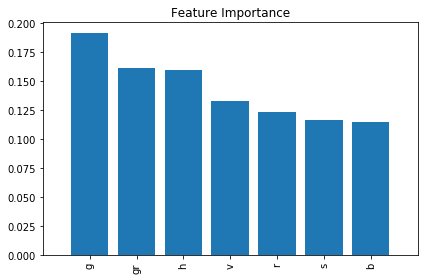

In [41]:
# Generamos la grafica

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')

plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()
